# **Proyek Analisis Data: Bike Sharing Dataset**

*   Nama:Bondan Tiur Mahendra
*   Email:bm333936@gmail.com
*   ID Dicoding: bondan_tiur_mahendra 







### Pertanyaan Bisnis

1.   Berapa jumlah rata-rata persewaan sepeda per jam, dan
bagaimana variasinya sepanjang hari?
2.   Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?



### Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy import stats

### Data Wrangling

#### Gathering Data

In [3]:
df = pd.read_csv("hour.csv")
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


##### **Insight**: Dari hasil output di atas, kita dapat melihat beberapa kolom penting dalam dataset, seperti:

* instant: Nomor urut baris.
* dteday: Tanggal data diambil.
* season: Musim dalam bentuk angka (1: musim semi, 2: musim panas, 3: musim gugur, 4: musim dingin).
* yr: Tahun, 0 untuk 2011 dan 1 untuk 2012.
* mnth: Bulan dari 1 hingga 12.
* hr: Jam dalam format 24 jam.
* holiday: 1 jika hari tersebut libur, 0 jika bukan libur.
* weekday: Hari dalam minggu, di mana 0 = Minggu, 1 = Senin, dan seterusnya.
* workingday: 1 jika hari kerja (bukan libur), 0 jika tidak.
* weathersit: Kondisi cuaca dalam kode numerik (1 = cerah, 2 = berkabut, 3 = hujan ringan, 4 = hujan lebat).
* temp: Suhu aktual dalam skala 0 hingga 1.
* atemp: Suhu "feels like" atau suhu yang dirasakan.
* hum: Kelembapan dalam skala 0 hingga 1.
* casual: Jumlah pengguna casual (tanpa registrasi).
* registered: Jumlah pengguna terdaftar.
* cnt: Jumlah total penyewaan sepeda.




#### Assessing Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


##### **Insight**: Dari hasil output di atas, kita dapat melihat dataset tidak memiliki nilai yang hilang (null) karena jumlah data non-null untuk setiap kolom sama dengan jumlah baris total.

### Cleaning Data

In [5]:
# Cek data duplikat
df.duplicated().sum()

0

##### **Insight**: Dari hasil output di atas, kita dapat melihat dataset tidak memiliki nilai yang terduplikat.

In [6]:
# Mengubah kolom 'dteday' dari string ke datetime
df.loc[:, 'dteday'] = pd.to_datetime(df['dteday'])

##### **Insight**: Dari peintah di atas, kita mengubah kolom 'dteday' dari string ke datetime.

### Exploratory Data Analysis (EDA)

In [7]:
# Deskripsi statistik dasar
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#### **Insight**: Dari hasil output di atas, kita dapat melihat ringkasan statistik seperti;

* count: Jumlah data yang tidak null untuk setiap kolom.
* mean: Rata-rata dari nilai numerik pada setiap kolom.
* std: Deviasi standar, yaitu ukuran sebaran data dari rata-rata.
* min: Nilai minimum pada setiap kolom.
* 25%: Kuartil pertama (nilai di bawah 25% data).
* 50%: Median (nilai tengah dari data).
* 75%: Kuartil ketiga (nilai di atas 75% data).
* max: Nilai maksimum pada setiap kolom.

In [13]:
# Group by jam
hourly_stats = df.groupby('hr')['cnt'].agg(['mean', 'std'])
print(hourly_stats)

          mean         std
hr                        
0    53.898072   42.307910
1    33.375691   33.538727
2    22.869930   26.578642
3    11.727403   13.239190
4     6.352941    4.143818
5    19.889819   13.200765
6    76.044138   55.084348
7   212.064649  161.441936
8   359.011004  235.189285
9   219.309491   93.703458
10  173.668501  102.205413
11  208.143054  127.495536
12  253.315934  145.081134
13  253.661180  148.107657
14  240.949246  147.271574
15  251.233196  144.632541
16  311.983562  148.682618
17  461.452055  232.656611
18  425.510989  224.639304
19  311.523352  161.050359
20  226.030220  119.670164
21  172.314560   89.788893
22  131.335165   69.937782
23   87.831044   50.846889


In [8]:
# Group by kondisi cuaca
weather_stats = df.groupby('weathersit')['cnt'].mean()
print(weather_stats)

weathersit
1    204.869272
2    175.165493
3    111.579281
4     74.333333
Name: cnt, dtype: float64


In [15]:
# Group by kondisi cuaca dan musim
weather_season_stats = df.groupby(['weathersit', 'season'])['cnt'].mean()
print(weather_season_stats)

weathersit  season
1           1         122.055535
            2         232.410983
            3         244.494207
            4         209.463779
2           1         103.074689
            2         181.261364
            3         224.848997
            4         201.483974
3           1          58.650407
            2         115.179803
            3         171.955390
            4         116.453333
4           1          74.333333
Name: cnt, dtype: float64


### Visualization & Explanatory Analysis

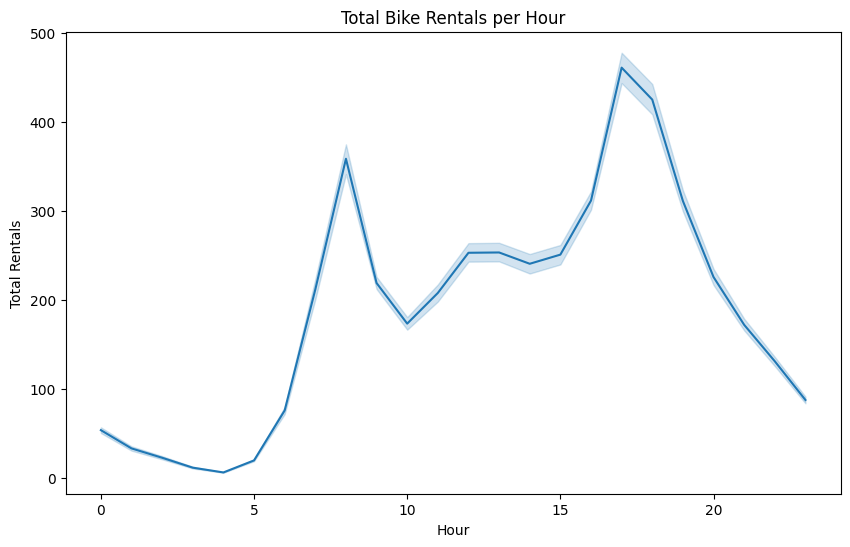

In [9]:
# Hubungan antara jumlah penyewaan dan jam
plt.figure(figsize=(10, 6))
sns.lineplot(x='hr', y='cnt', data=df)
plt.title('Total Bike Rentals per Hour')
plt.xlabel('Hour')
plt.ylabel('Total Rentals')
plt.show()

**Jawaban Pertanyaan ke 1:**

Rata-rata penyewaan sepeda paling banyak terjadi pada jam 17 dan 18 atau jam 5 PM dan 6 PM. Paling sedikit jam 4 AM

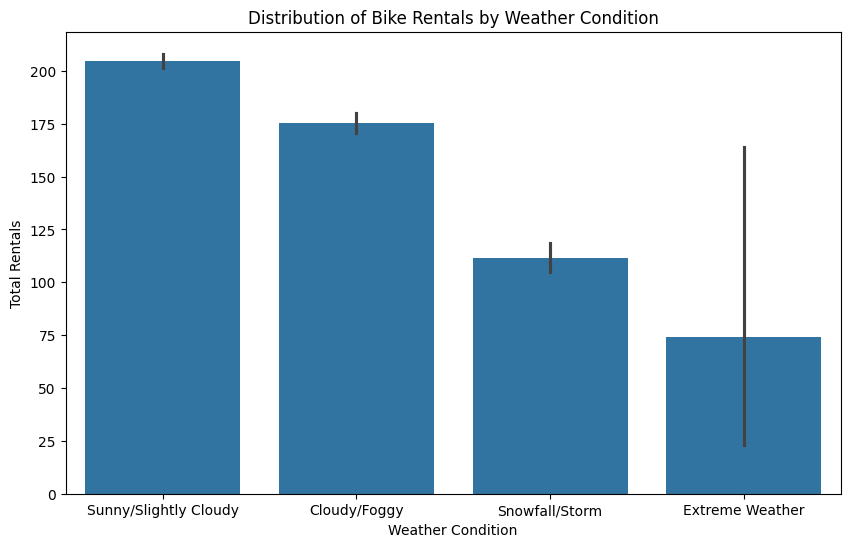

In [10]:
# Distribusi jumlah penyewaan dalam berbagai kondisi cuaca

plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit', y='cnt', data=df)
plt.title('Distribution of Bike Rentals by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Total Rentals')
plt.xticks([0, 1, 2, 3], ['Sunny/Slightly Cloudy', 'Cloudy/Foggy', 'Snowfall/Storm', 'Extreme Weather'])
plt.show()

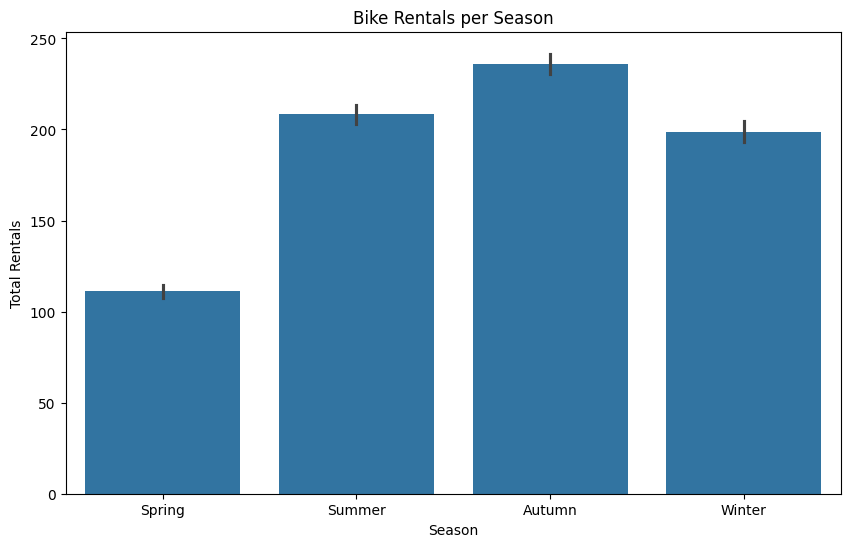

In [11]:
# Analisis berdasarkan musim
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='cnt', data=df)
plt.title('Bike Rentals per Season')
plt.xlabel('Season')
plt.ylabel('Total Rentals')
plt.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Autumn', 'Winter'])
plt.show()

**Jawaban Pertanyaan ke 2:**

Rata-rata penyewaan sepeda paling banyak terjadi pada kondisi cerah/berawan dan terjadi di musim gugur.

### Advanced Analysis

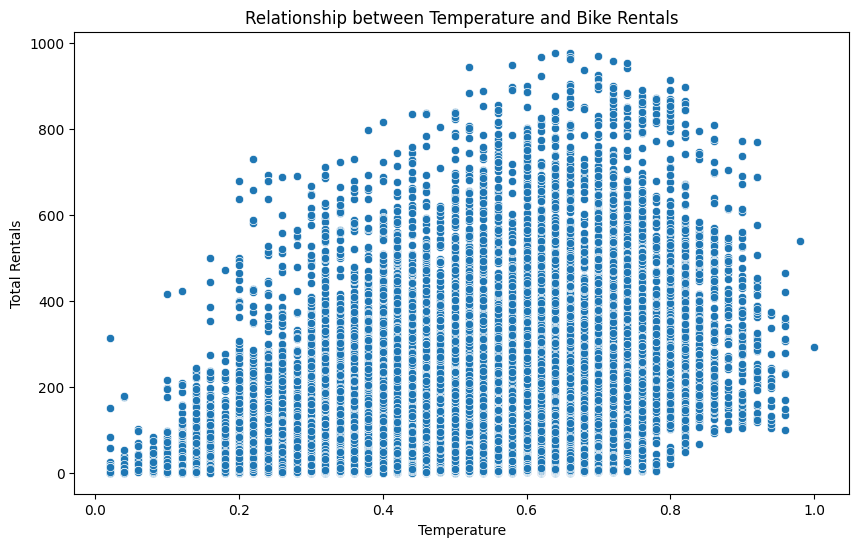

In [12]:
# Hubungan antara suhu dan jumlah penyewaan
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=df)
plt.title('Relationship between Temperature and Bike Rentals')
plt.xlabel('Temperature')
plt.ylabel('Total Rentals')
plt.show()

#### Jawaban Pertanyaan ke 1
**Rata-rata penyewaan sepeda paling banyak terjadi pada jam 17 dan 18 sebanyak 461 penyewa dan 425 penyewa. Paling sedikit jam 4 AM sebanyak 6 penyewa.**

1. [Puncak Penyewaan]
Terjadi peningkatan yang signifikan pada jam-jam sibuk seperti:
* Siang hari: Sekitar pukul 12-16. Ini bisa jadi karena banyak orang memanfaatkan waktu istirahat atau selesai bekerja untuk bersepeda.
* Sore hari: Sekitar pukul 17-19. Ini kemungkinan karena banyak orang yang bersepeda setelah pulang kerja atau untuk rekreasi.
2. [Lembah Penyewaan]
Jumlah penyewaan cenderung lebih rendah pada:
* Dini hari: Jam 0-5. Ini masuk akal karena sebagian besar orang sedang tidur.
* Subuh: Sekitar jam 6-7. Meskipun sudah mulai ada aktivitas, namun jumlah penyewaan belum mencapai puncaknya.

#### Jawaban Pertanyaan ke 2
**Kondisi Cuaca Berpengaruh Signifikan: Rata-rata penyewaan sepeda paling banyak mencapai 244 penyewa terjadi pada kondisi cerah/berawan dan terjadi di musim gugur.**

1. Cuaca Cerah (1): Jumlah penyewaan sepeda cenderung paling tinggi pada kondisi cuaca ini. Ini menunjukkan bahwa cuaca cerah sangat mendukung aktivitas bersepeda.
2. Cuaca Sedang (2): Jumlah penyewaan sepeda berada di antara kondisi cuaca cerah dan buruk. Ini menunjukkan bahwa cuaca berkabut atau sedikit mendung masih memungkinkan orang untuk bersepeda, meskipun tidak sebanyak pada cuaca cerah.
3. Cuaca Buruk (3 dan 4): Jumlah penyewaan sepeda menurun drastis pada kondisi cuaca buruk seperti hujan, salju, atau badai. Ini menunjukkan bahwa cuaca buruk menjadi penghalang utama bagi orang-orang untuk menggunakan sepeda.

### Conclusion
* Terdapat korelasi positif tingkat penggunaan sepeda antara kondisi cuaca cerah atau sedikit berawan dengan jumlah penyewa lebih dari 200 penyewa. Sebaliknya, cuaca ekstrem memiliki pengaruh negatif yang signifikan terhadap jumlah penyewaan sepeda yang hanya mendapat sekitar 75 penyewa.
* Fluktuasi jumlah penyewaan sepeda menunjukkan adanya pengaruh musiman yang kuat. Periode antara pertengahan musim semi hingga pertengahan musim gugur umumnya mengalami peningkatan jumlah penyewaan sekitar 175%, sementara musim dingin mencatat penurunan yang signifikan sekitar 28%.
* Terdapat lonjakan signifikan dalam jumlah penyewaan sepeda pada musim gugur, meskipun suhu udara mulai menurun. Hal ini mengindikasikan bahwa faktor-faktor lain selain suhu, seperti perubahan warna dedaunan, cuaca yang lebih sejuk namun cerah, atau adanya festival musim gugur, menjadi daya tarik utama bagi masyarakat untuk menyewa sepeda. Fenomena ini menunjukkan bahwa musim gugur merupakan musim puncak bagi aktivitas bersepeda, di mana orang-orang cenderung lebih sering keluar rumah untuk menikmati keindahan alam musim gugur.